In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from osgeo import gdal
from PIL import Image

In [102]:
aq=gdal.Open("H:/Ananya/AHP Layers/aquifer_reclassify.tif").ReadAsArray()
dd=gdal.Open("H:/Ananya/AHP Layers/dd_reclassify.tif").ReadAsArray()
lulc=gdal.Open("H:/Ananya/AHP Layers/LULC_reclassify.tif").ReadAsArray()
runoff=gdal.Open("H:/Ananya/AHP Layers/runoff_reclassify.tif").ReadAsArray()
slope=gdal.Open("H:/Ananya/AHP Layers/slope_final_reclassify.tif").ReadAsArray()
soil=gdal.Open("H:/Ananya/AHP Layers/soil_reclassify.tif").ReadAsArray()

In [103]:
print(aq.shape,dd.shape,lulc.shape,runoff.shape,slope.shape,soil.shape)

(250, 382) (251, 356) (10519, 14617) (10519, 14617) (3687, 5123) (249, 381)


In [105]:
aq1=np.array(Image.fromarray(aq).resize((14617,10519), Image.Resampling.NEAREST))
dd1=np.array(Image.fromarray(dd).resize((14617,10519), Image.Resampling.NEAREST))
slope1=np.array(Image.fromarray(slope).resize((14617,10519), Image.Resampling.NEAREST))
soil1=np.array(Image.fromarray(soil).resize((14617,10519), Image.Resampling.NEAREST))

In [123]:
print(aq1.shape,dd1.shape,soil1.shape,runoff.shape,lulc.shape,slope1.shape)

(10519, 14617) (10519, 14617) (10519, 14617) (10519, 14617) (10519, 14617) (10519, 14617)


In [109]:
ss=[aq1,dd1,lulc,runoff,slope1,soil1]

In [110]:
for i in ss:
    print(i.shape)

(10519, 14617)
(10519, 14617)
(10519, 14617)
(10519, 14617)
(10519, 14617)
(10519, 14617)


In [111]:
for i in ss:
    print(np.min(i))
    print(np.max(i))

0
3
1
15
1
15
1
15
1
15
0
3


In [112]:
ch15=[dd1,lulc,runoff,slope1]


In [113]:
dd5=np.where(dd1>3,0, dd1)

In [118]:
lulc5=np.where(lulc>3, 0, lulc)

In [124]:
runoff5=np.where(runoff>3,0,runoff)

In [125]:
slope1=np.where(slope1>3,0,slope1)

In [126]:
ff=[aq1,dd5,lulc5,runoff5,slope1,soil1]

In [127]:
for i in ff:
    print(np.min(i))
    print(np.max(i))

0
3
0
3
0
3
0
3
0
3
0
3


In [128]:
out=(aq1*0.43906857)+(lulc5*0.228725407)+(dd5*0.165229988)+(soil1*0.098898243)+(runoff5*0.044423569)+(slope1*0.023654223)

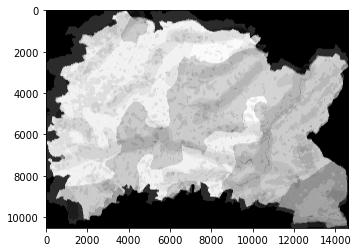

In [130]:
plt.imshow(out, cmap="gray")

In [131]:
np.min(out)
np.max(out)

0.0

In [134]:
out.shape

(10519, 14617)

In [135]:
lulc=gdal.Open("H:/Ananya/AHP Layers/LULC_reclassify.tif")


In [139]:
lulcr=lulc.GetRasterBand(1)

In [141]:
width=lulc.RasterXSize
height=lulc.RasterYSize

In [142]:
width

14617

In [143]:
height

10519

In [144]:
gt = lulc.GetGeoTransform()
proj = lulc.GetProjection()

In [151]:
out.shape

(10519, 14617)

In [152]:
out_ds = gdal.GetDriverByName("GTiff")
output_ds = out_ds.Create("AHP.tif", xsize=width, ysize=height, bands=1, eType=gdal.GDT_Float32)
output_ds.SetGeoTransform(gt)
output_ds.SetProjection(proj)
b1 = output_ds.GetRasterBand(1)
b1.WriteArray(out)
output_ds.FlushCache()
output_ds = None
b1 = None